# Termómetro

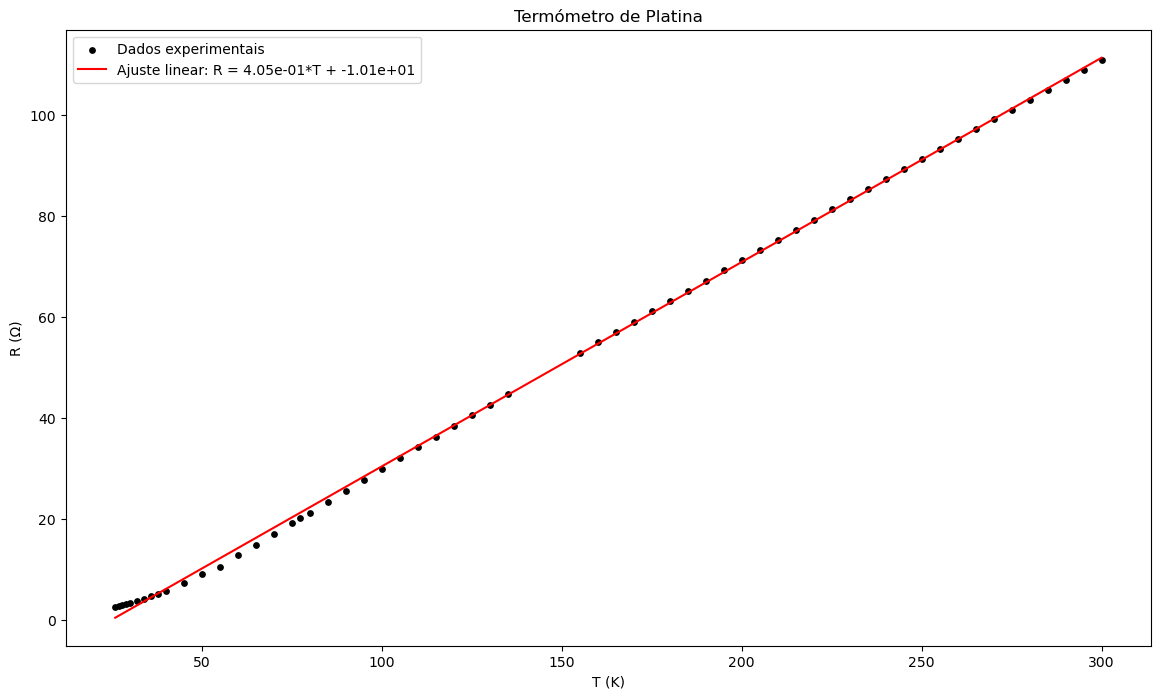

Equação do ajuste linear: R = 4.05e-01*T + -1.01e+01
Coeficiente de determinação (R²): 0.99954


In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Ler o ficheiro csv com o separador correto
file_path = '/Users/emanuelmiranda/Desktop/Exp10/Dados/Termometro.csv'
data = pd.read_csv(file_path, sep=';')

# Renomear as colunas, se necessário
data.columns = ["T (K)", "R (Ω)"]

# Realizar o ajuste linear (invertendo os eixos)
slope, intercept, r_value, p_value, std_err = linregress(data["T (K)"], data["R (Ω)"])

# Criar os valores ajustados para a linha de regressão
x_fit = np.linspace(data["T (K)"].min(), data["T (K)"].max(), 100)
y_fit = slope * x_fit + intercept

# Plotar o gráfico scatter e o ajuste linear
plt.figure(figsize=(14, 8))
plt.scatter(data["T (K)"], data["R (Ω)"], label='Dados experimentais', s=15, color='black')
plt.plot(x_fit, y_fit, label=f'Ajuste linear: R = {slope:.2e}*T + {intercept:.2e}', color='red')

# Configurações do gráfico
plt.xlabel("T (K)")
plt.ylabel("R (Ω)")
plt.legend()
plt.grid(False)
plt.show()

# Imprimir a equação do ajuste linear e o coeficiente de determinação
print(f"Equação do ajuste linear: R = {slope:.2e}*T + {intercept:.2e}")
print(f"Coeficiente de determinação (R²): {r_value**2:.5f}")

# Arrefecimento

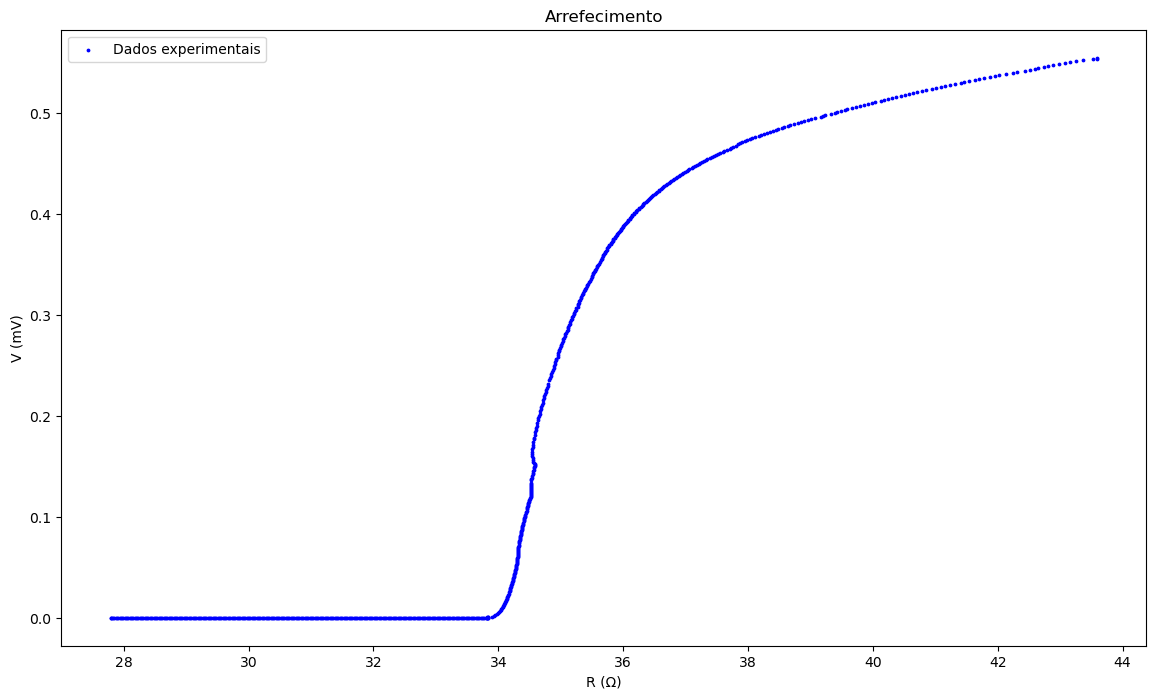

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Ler o ficheiro csv com o separador correto
file_path = '/Users/emanuelmiranda/Desktop/Exp10/Dados/Arrefecimento.csv'
data = pd.read_csv(file_path, sep=';')

# Renomear as colunas, se necessário
data.columns = ["V (mV)", "R (Ω)"]

# Converter R de mΩ para Ω
data["R (Ω)"] = data["R (Ω)"] / 1000
data["V (mV)"] = data["V (mV)"] / 1000

# Criar o linspace entre R=27.791 e R=33.818 com valores de V=0
r_gap = np.linspace(27.791, 33.818, 300)  # 100 pontos no intervalo
v_gap = np.zeros_like(r_gap)  # Todos os valores de V = 0

# Plotar o gráfico scatter original
plt.figure(figsize=(14, 8))
plt.scatter(data["R (Ω)"], data["V (mV)"], label='Dados experimentais', s=3, color='blue')

# Adicionar os valores do linspace ao gráfico
plt.scatter(r_gap, v_gap, s=3, color='blue')

# Configurações do gráfico
plt.xlabel("R (Ω)")
plt.ylabel("V (mV)")
plt.title("Arrefecimento")
plt.legend()
plt.grid(False)
plt.show()

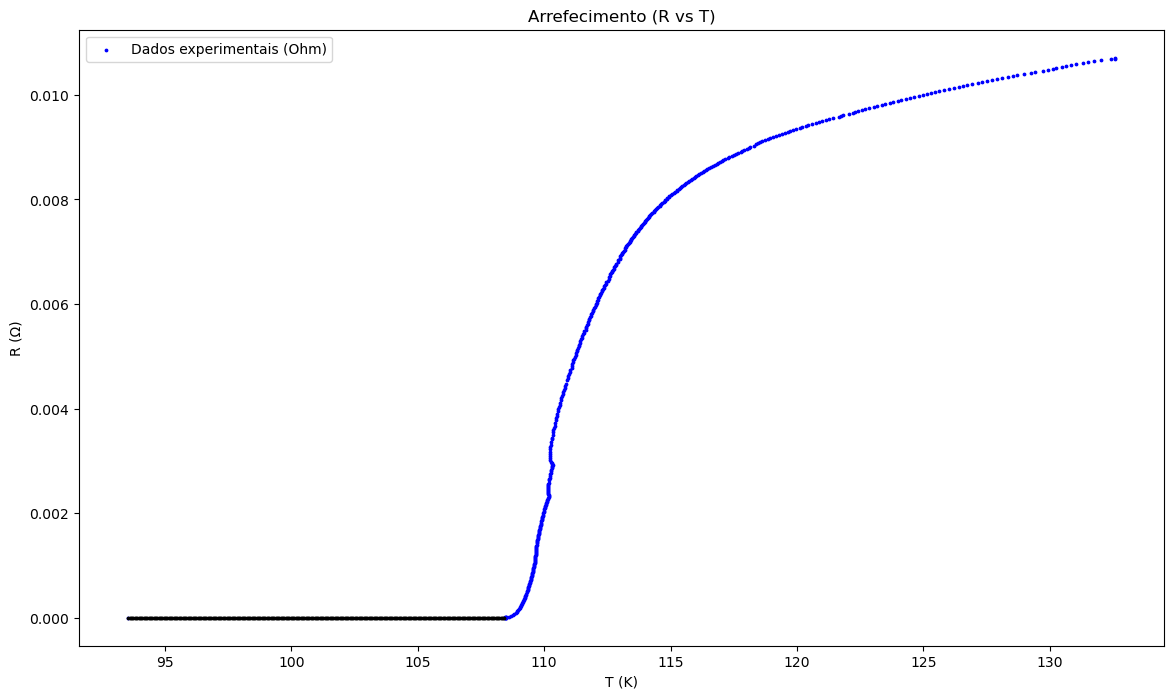

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Ler o ficheiro csv com o separador correto
file_path = '/Users/emanuelmiranda/Desktop/Exp10/Dados/Arrefecimento.csv'
data = pd.read_csv(file_path, sep=';')

# Renomear as colunas, se necessário
data.columns = ["V (mV)", "R (Ω)"]

# Converter R de mΩ para Ω e V de mV para V
data["R (Ω)"] = data["R (Ω)"] / 1000
data["V (mV)"] = data["V (mV)"] / 1000

# Corrente constante
I = 51.82  # Amperes

# Calcular R a partir de V usando a Lei de Ohm: R = V / I
data["R (calc)"] = data["V (mV)"] / I

# Converter R para T usando a equação: T = (R + 10.1) / 0.405
data["T (K)"] = (data["R (Ω)"] + 10.1) / 0.405

# Criar o linspace entre R=27.791 e R=33.818 com valores de R=0
r_gap = np.linspace(27.791, 33.812, 300)  # 300 pontos no intervalo
t_gap = (r_gap + 10.1) / 0.405  # Converter R do gap para T

# Plotar o gráfico scatter original
fig, ax = plt.subplots(figsize=(14, 8))

# Gráfico principal
ax.scatter(data["T (K)"], data["R (calc)"], label='Dados experimentais (Ohm)', s=3, color='blue')
ax.scatter(t_gap, np.zeros_like(t_gap), s=3, color='black')
ax.set_xlabel("T (K)")
ax.set_ylabel("R (Ω)")
ax.set_title("Arrefecimento (R vs T)")
ax.legend()
ax.grid(False)

plt.show()

# Ajuste

/var/folders/23/vs6dqd9j0xvd2q44gyvv8wkr0000gn/T/ipykernel_54838/4132352196.py:38: RuntimeWarning: overflow encountered in power
  term1 = np.exp(A * (T**B) / (T0**B))
/var/folders/23/vs6dqd9j0xvd2q44gyvv8wkr0000gn/T/ipykernel_54838/4132352196.py:38: RuntimeWarning: overflow encountered in double_scalars
  term1 = np.exp(A * (T**B) / (T0**B))
/var/folders/23/vs6dqd9j0xvd2q44gyvv8wkr0000gn/T/ipykernel_54838/4132352196.py:38: RuntimeWarning: invalid value encountered in true_divide
  term1 = np.exp(A * (T**B) / (T0**B))


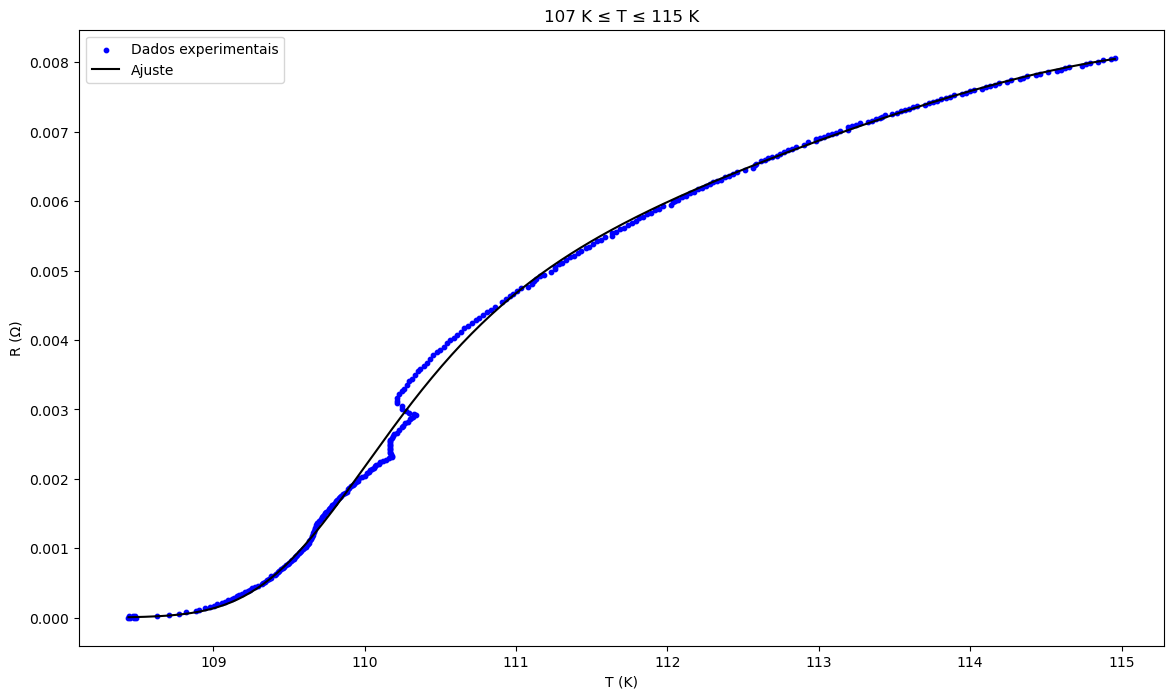

Parâmetros ajustados:
A = -11.8286 ± 0.2046
B = -1.2907 ± 0.0534
C = 6.2605 ± 0.1881
D = 94.9298 ± 1.7787
E = -165546.9616 ± 28797.6396
Incerteza global do ajuste: 5.63%


In [171]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Definir a janela de temperatura
T_min = 107  # Limite inferior da janela
T_max = 115  # Limite superior da janela

# Ler o ficheiro csv com o separador correto
file_path = '/Users/emanuelmiranda/Desktop/Exp10/Dados/Arrefecimento.csv'
data = pd.read_csv(file_path, sep=';')

# Renomear colunas e converter unidades
data.columns = ["V (mV)", "R (Ω)"]
data["R (Ω)"] = data["R (Ω)"] / 1000  # mΩ para Ω
data["V (mV)"] = data["V (mV)"] / 1000  # mV para V

# Corrente constante
I = 51.82  # Amperes

# Calcular R a partir de V usando a Lei de Ohm: R = V / I
data["R (calc)"] = data["V (mV)"] / I

# Converter R para T
data["T (K)"] = (data["R (Ω)"] + 10.1) / 0.405

# Filtrar dados dentro da janela de temperatura definida
data_filtered = data[(data["T (K)"] >= T_min) & (data["T (K)"] <= T_max)]
T = data_filtered["T (K)"].values
R = data_filtered["R (calc)"].values

# T0 é a temperatura mais baixa na janela selecionada
T0 = T.min()

# Definir a função de ajuste
def ajuste_func(T, A, B, C, D, E):
    term1 = np.exp(A * (T**B) / (T0**B))
    term2 = np.exp(C * np.tanh(D * np.log(T / T0)))
    term3 = np.exp(E * (np.log(T / T0))**5)
    return term1 * term2 * term3

# Ajustar os dados
parametros_iniciais = [1, 1, 1, 1, 1]  # Valores iniciais para os parâmetros
params, cov = curve_fit(ajuste_func, T, R, p0=parametros_iniciais)

# Obter incertezas dos parâmetros
perr = np.sqrt(np.diag(cov))  # Desvio padrão de cada parâmetro

# Calcular incerteza percentual global
incerteza_percentual = np.mean(perr / np.abs(params)) * 100

# Gerar valores ajustados
T_fit = np.linspace(T.min(), T.max(), 300)
R_fit = ajuste_func(T_fit, *params)

# Plotar os dados experimentais e o ajuste
plt.figure(figsize=(14, 8))
plt.scatter(T, R, label="Dados experimentais", s=10, color='blue')
plt.plot(T_fit, R_fit, label="Ajuste", color='black')
plt.xlabel("T (K)")
plt.ylabel("R (Ω)")
plt.title(f"{T_min} K ≤ T ≤ {T_max} K")
plt.legend()
plt.grid(False)
plt.show()

# Mostrar os parâmetros ajustados
print("Parâmetros ajustados:")
print(f"A = {params[0]:.4f} ± {perr[0]:.4f}")
print(f"B = {params[1]:.4f} ± {perr[1]:.4f}")
print(f"C = {params[2]:.4f} ± {perr[2]:.4f}")
print(f"D = {params[3]:.4f} ± {perr[3]:.4f}")
print(f"E = {params[4]:.4f} ± {perr[4]:.4f}")

# Imprimir incerteza percentual
print(f"Incerteza global do ajuste: {incerteza_percentual:.2f}%")

# Temperatura crítica (arrefecimento)

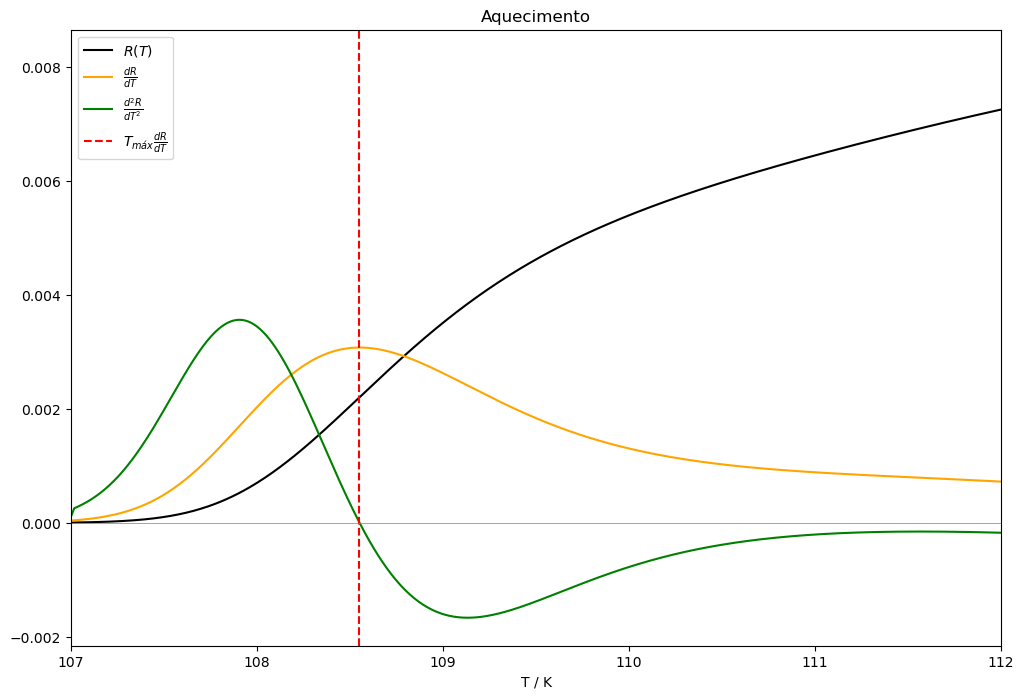

O valor de T onde d²R/dT² = 0 (máximo de dR/dT) é aproximadamente: 108.5455 K


In [164]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros fornecidos
A = -11.8286
B = -1.2907
C = 6.2605
D = 94.9298
E = -165546.9616

# Função de ajuste
def ajuste_func(T, A, B, C, D, E, T0):
    term1 = np.exp(A * (T**B) / (T0**B))
    term2 = np.exp(C * np.tanh(D * np.log(T / T0)))
    term3 = np.exp(E * (np.log(T / T0))**5)
    return term1 * term2 * term3

# Temperatura
T_min, T_max = 107, 115
T0 = T_min
T = np.linspace(T_min, T_max, 1000)

# Calcular R
R = ajuste_func(T, A, B, C, D, E, T0)

# Derivadas por diferenças finitas
dR_dT = np.gradient(R, T)
d2R_dT2 = np.gradient(dR_dT, T)

# Encontrar o ponto onde d²R/dT² = 0 (cruzamento do eixo)
idx_zero = np.where(np.diff(np.sign(d2R_dT2)))[0][0]
T_max_dR_dT = T[idx_zero]

# Plot dos gráficos
plt.figure(figsize=(12, 8))
plt.plot(T, R, label=r"$R(T)$", color='black')
plt.plot(T, dR_dT, label=r"$\frac{dR}{dT}$", color='orange')
plt.plot(T, d2R_dT2, label=r"$\frac{d^2R}{dT^2}$", color='green')
plt.axvline(x=T_max_dR_dT, color='red', linestyle='--', label=r"$T_{máx} \frac{dR}{dT}$")
plt.axhline(0, color='gray', linewidth=0.5)

# Adicionar título e legendas
plt.title("Aquecimento")
plt.xlim(107,112)
plt.xlabel("T / K")
plt.legend()
plt.grid(False)
plt.show()

# Mostrar o valor de T onde d²R/dT² = 0
print(f"O valor de T onde d²R/dT² = 0 (máximo de dR/dT) é aproximadamente: {T_max_dR_dT:.4f} K")

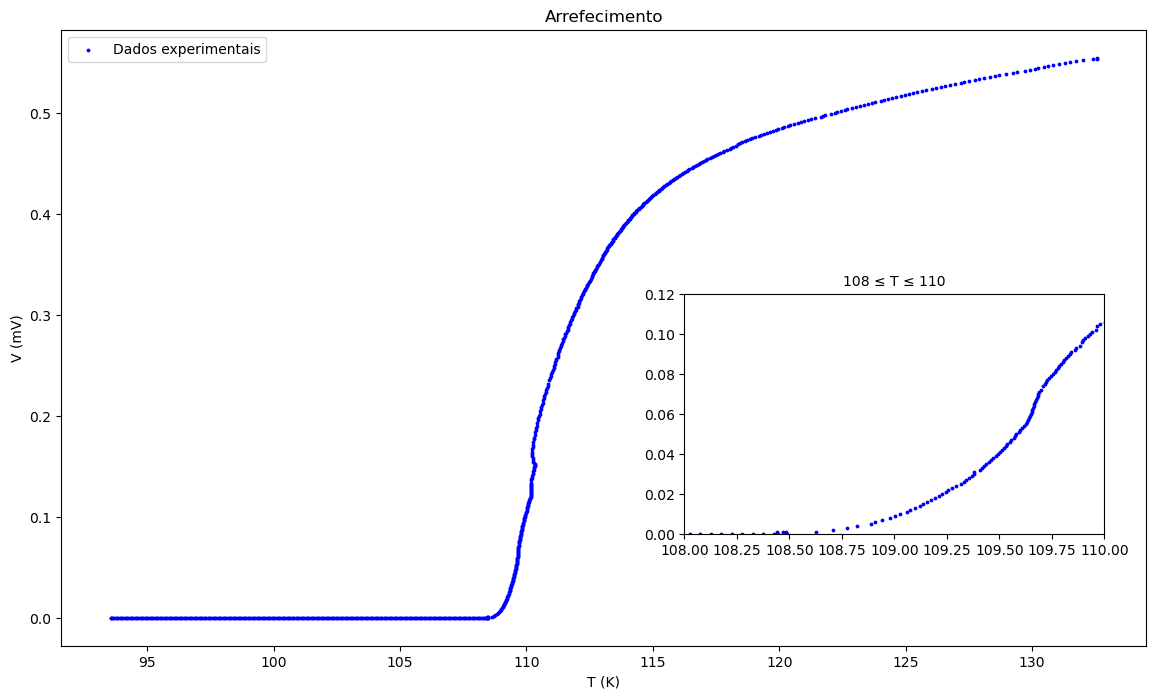

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Ler o ficheiro csv com o separador correto
file_path = '/Users/emanuelmiranda/Desktop/Exp10/Dados/Arrefecimento.csv'
data = pd.read_csv(file_path, sep=';')

# Renomear as colunas, se necessário
data.columns = ["V (mV)", "R (Ω)"]

# Converter R de mΩ para Ω e V de mV para V
data["R (Ω)"] = data["R (Ω)"] / 1000
data["V (mV)"] = data["V (mV)"] / 1000

# Converter R para T usando a equação: T = (R + 10.1) / 0.405
data["T (K)"] = (data["R (Ω)"] + 10.1) / 0.405

# Criar o linspace entre R=27.791 e R=33.818 com valores de V=0
r_gap = np.linspace(27.791, 33.812, 300)  # 300 pontos no intervalo
t_gap = (r_gap + 10.1) / 0.405  # Converter R do gap para T
v_gap = np.zeros_like(r_gap)  # Todos os valores de V = 0

# Plotar o gráfico scatter original
fig, ax = plt.subplots(figsize=(14, 8))

# Gráfico principal
ax.scatter(data["T (K)"], data["V (mV)"], label='Dados experimentais', s=3, color='blue')
ax.scatter(t_gap, v_gap, s=3, color='black')
ax.set_xlabel("T (K)")
ax.set_ylabel("V (mV)")
ax.set_title("Arrefecimento")
ax.legend()
ax.grid(False)

# Criar o inset
ax_inset = fig.add_axes([0.57, 0.25, 0.3, 0.3])  # [x, y, largura, altura]
mask_inset = (data["T (K)"] >= 108) & (data["T (K)"] <= 113)  # Filtro para o intervalo do inset
ax_inset.scatter(data["T (K)"][mask_inset], data["V (mV)"][mask_inset], s=3, color='blue')
ax_inset.scatter(t_gap[(t_gap >= 108) & (t_gap <= 110)], v_gap[(t_gap >= 108) & (t_gap <= 110)], s=3, color='black')
ax_inset.set_xlim(108, 110)
ax_inset.set_ylim(0, 0.12)
ax_inset.set_title("108 ≤ T ≤ 110", fontsize=10)

plt.show()

# Aquecimento

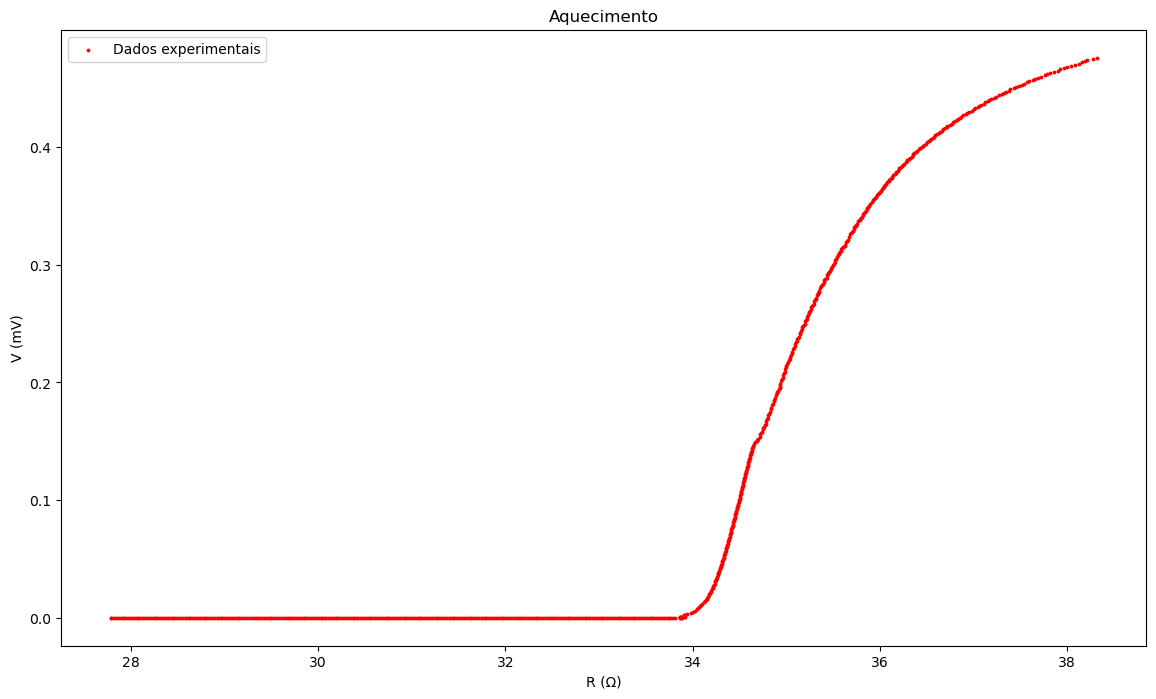

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Ler o ficheiro csv com o separador correto
file_path = '/Users/emanuelmiranda/Desktop/Exp10/Dados/Aquecimento.csv'
data = pd.read_csv(file_path, sep=';')

# Renomear as colunas, se necessário
data.columns = ["V (mV)", "R (Ω)"]

# Converter R de mΩ para Ω
data["R (Ω)"] = data["R (Ω)"] / 1000
data["V (mV)"] = data["V (mV)"] / 1000

# Criar o linspace entre R=27.791 e R=33.818 com valores de V=0
r_gap = np.linspace(27.791, 33.812, 300)  # 100 pontos no intervalo
v_gap = np.zeros_like(r_gap)  # Todos os valores de V = 0

# Plotar o gráfico scatter original
plt.figure(figsize=(14, 8))
plt.scatter(data["R (Ω)"], data["V (mV)"], label='Dados experimentais', s=3, color='red')

# Adicionar os valores do linspace ao gráfico
plt.scatter(r_gap, v_gap, s=3, color='red')

# Configurações do gráfico
plt.xlabel("R (Ω)")
plt.ylabel("V (mV)")
plt.title("Aquecimento")
plt.legend()
plt.grid(False)
plt.show()

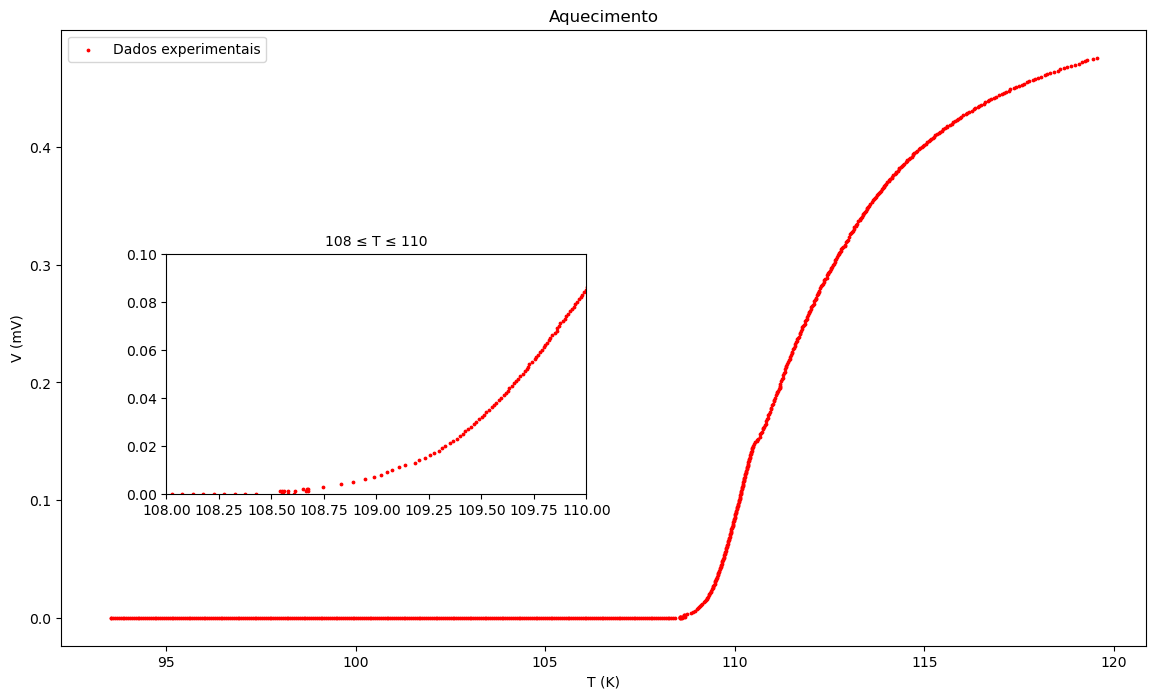

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Ler o ficheiro csv com o separador correto
file_path = '/Users/emanuelmiranda/Desktop/Exp10/Dados/Aquecimento.csv'
data = pd.read_csv(file_path, sep=';')

# Renomear as colunas, se necessário
data.columns = ["V (mV)", "R (Ω)"]

# Converter R de mΩ para Ω e V de mV para V
data["R (Ω)"] = data["R (Ω)"] / 1000
data["V (mV)"] = data["V (mV)"] / 1000

# Converter R para T usando a equação: T = (R + 10.1) / 0.405
data["T (K)"] = (data["R (Ω)"] + 10.1) / 0.405

# Criar o linspace entre R=27.791 e R=33.818 com valores de V=0
r_gap = np.linspace(27.791, 33.812, 300)  # 300 pontos no intervalo
t_gap = (r_gap + 10.1) / 0.405  # Converter R do gap para T
v_gap = np.zeros_like(r_gap)  # Todos os valores de V = 0

# Plotar o gráfico scatter original
fig, ax = plt.subplots(figsize=(14, 8))

# Gráfico principal
ax.scatter(data["T (K)"], data["V (mV)"], label='Dados experimentais', s=3, color='red')
ax.scatter(t_gap, v_gap, s=3, color='red')
ax.set_xlabel("T (K)")
ax.set_ylabel("V (mV)")
ax.set_title("Aquecimento")
ax.legend()
ax.grid(False)

# Criar o inset
ax_inset = fig.add_axes([0.2, 0.3, 0.3, 0.3])  # [x, y, largura, altura]
mask_inset = (data["T (K)"] >= 108) & (data["T (K)"] <= 113)  # Filtro para o intervalo do inset
ax_inset.scatter(data["T (K)"][mask_inset], data["V (mV)"][mask_inset], s=3, color='red')
ax_inset.scatter(t_gap[(t_gap >= 108) & (t_gap <= 113)], v_gap[(t_gap >= 108) & (t_gap <= 110)], s=3, color='red')
ax_inset.set_xlim(108, 110)
ax_inset.set_ylim(0, 0.10)
ax_inset.set_title("108 ≤ T ≤ 110", fontsize=10)

plt.show()

# Ajuste

/var/folders/23/vs6dqd9j0xvd2q44gyvv8wkr0000gn/T/ipykernel_54838/1502318983.py:38: RuntimeWarning: overflow encountered in power
  term1 = np.exp(A * (T**B) / (T0**B))
/var/folders/23/vs6dqd9j0xvd2q44gyvv8wkr0000gn/T/ipykernel_54838/1502318983.py:38: RuntimeWarning: overflow encountered in double_scalars
  term1 = np.exp(A * (T**B) / (T0**B))
/var/folders/23/vs6dqd9j0xvd2q44gyvv8wkr0000gn/T/ipykernel_54838/1502318983.py:38: RuntimeWarning: invalid value encountered in true_divide
  term1 = np.exp(A * (T**B) / (T0**B))


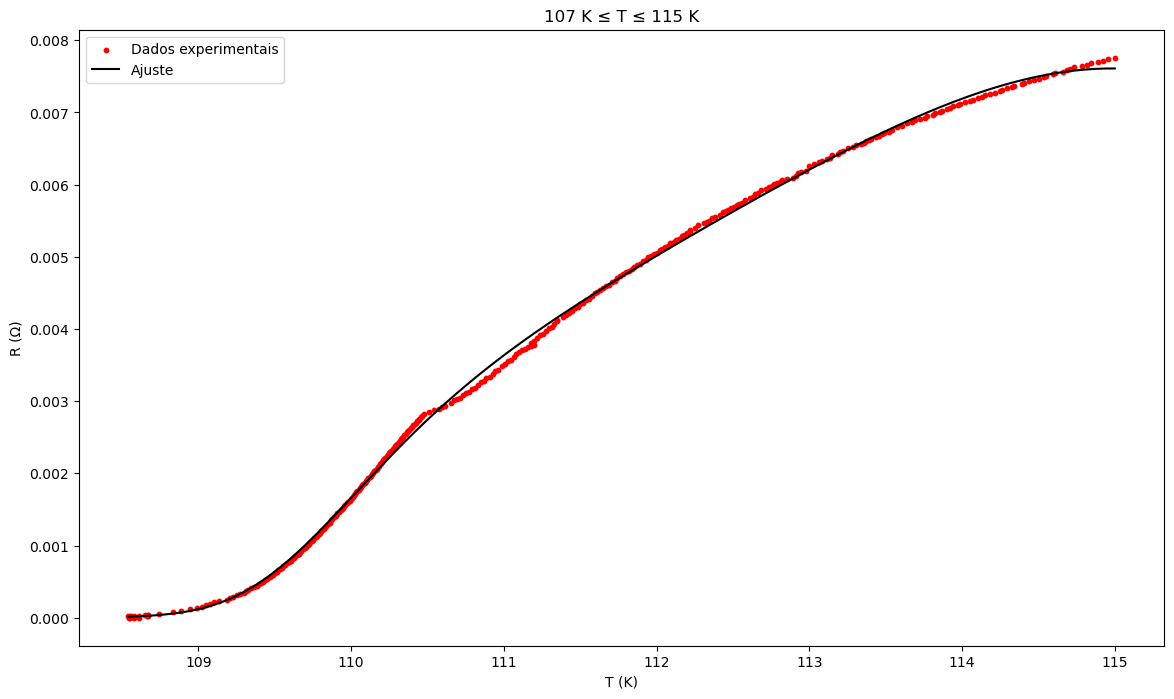

Parâmetros ajustados:
A = -11.1648 ± 0.1141
B = -2.5551 ± 0.0290
C = 5.0422 ± 0.1068
D = 100.1277 ± 1.2388
E = -447408.9083 ± 14107.2090
Incerteza global do ajuste: 1.73%


In [172]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Definir a janela de temperatura
T_min = 107  # Limite inferior da janela
T_max = 115  # Limite superior da janela

# Ler o ficheiro csv com o separador correto
file_path = '/Users/emanuelmiranda/Desktop/Exp10/Dados/Aquecimento.csv'
data = pd.read_csv(file_path, sep=';')

# Renomear colunas e converter unidades
data.columns = ["V (mV)", "R (Ω)"]
data["R (Ω)"] = data["R (Ω)"] / 1000  # mΩ para Ω
data["V (mV)"] = data["V (mV)"] / 1000  # mV para V

# Corrente constante
I = 51.82  # Amperes

# Calcular R a partir de V usando a Lei de Ohm: R = V / I
data["R (calc)"] = data["V (mV)"] / I

# Converter R para T
data["T (K)"] = (data["R (Ω)"] + 10.1) / 0.405

# Filtrar dados dentro da janela de temperatura definida
data_filtered = data[(data["T (K)"] >= T_min) & (data["T (K)"] <= T_max)]
T = data_filtered["T (K)"].values
R = data_filtered["R (calc)"].values

# T0 é a temperatura mais baixa na janela selecionada
T0 = T.min()

# Definir a função de ajuste
def ajuste_func(T, A, B, C, D, E):
    term1 = np.exp(A * (T**B) / (T0**B))
    term2 = np.exp(C * np.tanh(D * np.log(T / T0)))
    term3 = np.exp(E * (np.log(T / T0))**5)
    return term1 * term2 * term3

# Ajustar os dados
parametros_iniciais = [1, 1, 1, 1, 1]  # Valores iniciais para os parâmetros
params, cov = curve_fit(ajuste_func, T, R, p0=parametros_iniciais)

# Obter incertezas dos parâmetros
perr = np.sqrt(np.diag(cov))  # Desvio padrão de cada parâmetro

# Calcular incerteza percentual global
incerteza_percentual = np.mean(perr / np.abs(params)) * 100

# Gerar valores ajustados
T_fit = np.linspace(T.min(), T.max(), 300)
R_fit = ajuste_func(T_fit, *params)

# Plotar os dados experimentais e o ajuste
plt.figure(figsize=(14, 8))
plt.scatter(T, R, label="Dados experimentais", s=10, color='red')
plt.plot(T_fit, R_fit, label="Ajuste", color='black')
plt.xlabel("T (K)")
plt.ylabel("R (Ω)")
plt.title(f"{T_min} K ≤ T ≤ {T_max} K")
plt.legend()
plt.grid(False)
plt.show()

# Mostrar os parâmetros ajustados
print("Parâmetros ajustados:")
print(f"A = {params[0]:.4f} ± {perr[0]:.4f}")
print(f"B = {params[1]:.4f} ± {perr[1]:.4f}")
print(f"C = {params[2]:.4f} ± {perr[2]:.4f}")
print(f"D = {params[3]:.4f} ± {perr[3]:.4f}")
print(f"E = {params[4]:.4f} ± {perr[4]:.4f}")

# Imprimir incerteza percentual
print(f"Incerteza global do ajuste: {incerteza_percentual:.2f}%")

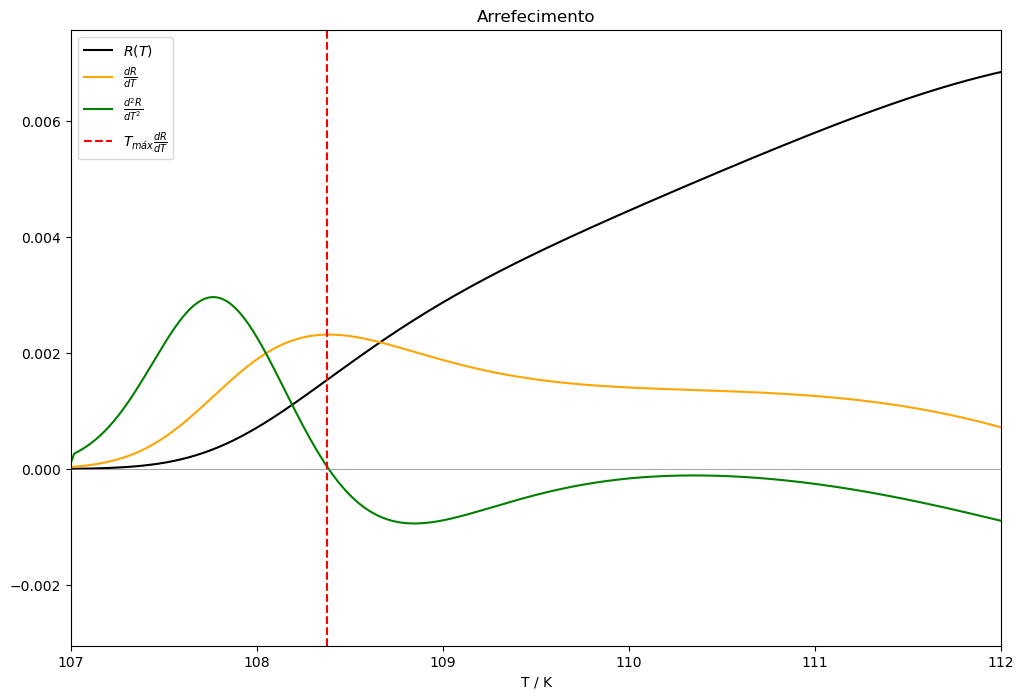

O valor de T onde d²R/dT² = 0 (máximo de dR/dT) é aproximadamente: 108.3774 K


In [162]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros fornecidos
A = -12.0010
B = -2.9040
C = 5.6977
D = 112.3580
E = -865324.3706

# Função de ajuste
def ajuste_func(T, A, B, C, D, E, T0):
    term1 = np.exp(A * (T**B) / (T0**B))
    term2 = np.exp(C * np.tanh(D * np.log(T / T0)))
    term3 = np.exp(E * (np.log(T / T0))**5)
    return term1 * term2 * term3

# Temperatura
T_min, T_max = 107, 115
T0 = T_min
T = np.linspace(T_min, T_max, 1000)

# Calcular R
R = ajuste_func(T, A, B, C, D, E, T0)

# Derivadas por diferenças finitas
dR_dT = np.gradient(R, T)
d2R_dT2 = np.gradient(dR_dT, T)

# Encontrar o ponto onde d²R/dT² = 0 (cruzamento do eixo)
idx_zero = np.where(np.diff(np.sign(d2R_dT2)))[0][0]
T_max_dR_dT = T[idx_zero]

# Plot dos gráficos
plt.figure(figsize=(12, 8))
plt.plot(T, R, label=r"$R(T)$", color='black')
plt.plot(T, dR_dT, label=r"$\frac{dR}{dT}$", color='orange')
plt.plot(T, d2R_dT2, label=r"$\frac{d^2R}{dT^2}$", color='green')
plt.axvline(x=T_max_dR_dT, color='red', linestyle='--', label=r"$T_{máx} \frac{dR}{dT}$")
plt.axhline(0, color='gray', linewidth=0.5)

# Adicionar título e legendas
plt.title("Arrefecimento")
plt.xlim(107,112)
plt.xlabel("T / K")
plt.legend()
plt.grid(False)
plt.show()

# Mostrar o valor de T onde d²R/dT² = 0
print(f"O valor de T onde d²R/dT² = 0 (máximo de dR/dT) é aproximadamente: {T_max_dR_dT:.4f} K")

# Combinado

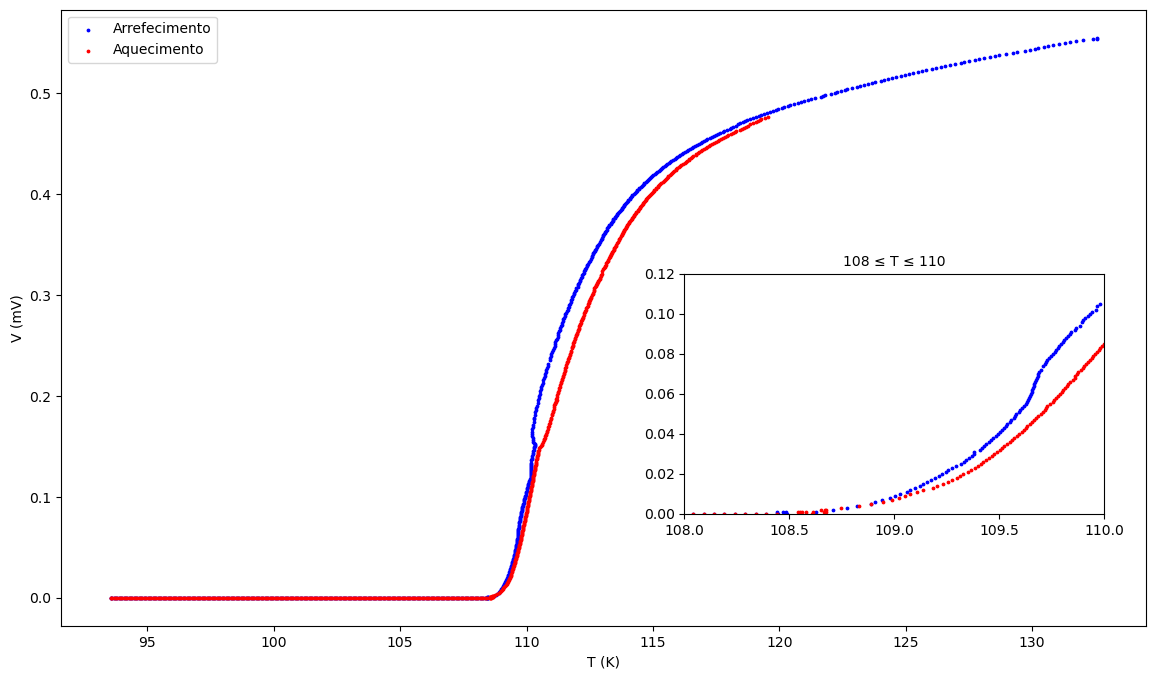

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Ler o ficheiro csv do arrefecimento
file_path_arrefecimento = '/Users/emanuelmiranda/Desktop/Exp10/Dados/Arrefecimento.csv'
data_arrefecimento = pd.read_csv(file_path_arrefecimento, sep=';')

# Renomear as colunas, se necessário
data_arrefecimento.columns = ["V (mV)", "R (Ω)"]

# Converter R de mΩ para Ω e V de mV para V
data_arrefecimento["R (Ω)"] = data_arrefecimento["R (Ω)"] / 1000
data_arrefecimento["V (mV)"] = data_arrefecimento["V (mV)"] / 1000

# Converter R para T usando a equação: T = (R + 10.1) / 0.405
data_arrefecimento["T (K)"] = (data_arrefecimento["R (Ω)"] + 10.1) / 0.405

# Criar o linspace para o gap do arrefecimento
r_gap_arrefecimento = np.linspace(27.791, 33.818, 300)
t_gap_arrefecimento = (r_gap_arrefecimento + 10.1) / 0.405
v_gap_arrefecimento = np.zeros_like(r_gap_arrefecimento)

# Ler o ficheiro csv do aquecimento
file_path_aquecimento = '/Users/emanuelmiranda/Desktop/Exp10/Dados/Aquecimento.csv'
data_aquecimento = pd.read_csv(file_path_aquecimento, sep=';')

# Renomear as colunas, se necessário
data_aquecimento.columns = ["V (mV)", "R (Ω)"]

# Converter R de mΩ para Ω e V de mV para V
data_aquecimento["R (Ω)"] = data_aquecimento["R (Ω)"] / 1000
data_aquecimento["V (mV)"] = data_aquecimento["V (mV)"] / 1000

# Converter R para T usando a equação: T = (R + 10.1) / 0.405
data_aquecimento["T (K)"] = (data_aquecimento["R (Ω)"] + 10.1) / 0.405

# Criar o linspace para o gap do aquecimento
r_gap_aquecimento = np.linspace(27.791, 33.818, 300)
t_gap_aquecimento = (r_gap_aquecimento + 10.1) / 0.405
v_gap_aquecimento = np.zeros_like(r_gap_aquecimento)

# Plotar o gráfico combinado
fig, ax = plt.subplots(figsize=(14, 8))

# Adicionar os dados experimentais do arrefecimento
ax.scatter(data_arrefecimento["T (K)"], data_arrefecimento["V (mV)"], label='Arrefecimento', s=3, color='blue')

# Adicionar os valores do linspace do arrefecimento
ax.scatter(t_gap_arrefecimento, v_gap_arrefecimento, s=3, color='blue')

# Adicionar os dados experimentais do aquecimento
ax.scatter(data_aquecimento["T (K)"], data_aquecimento["V (mV)"], label='Aquecimento', s=3, color='red')

# Adicionar os valores do linspace do aquecimento
ax.scatter(t_gap_aquecimento, v_gap_aquecimento, s=3, color='red')

# Configurações do gráfico principal
ax.set_xlabel("T (K)")
ax.set_ylabel("V (mV)")
ax.legend()
ax.grid(False)

# Criar o inset focando em T = [108, 113]
ax_inset = fig.add_axes([0.57, 0.25, 0.3, 0.3])  # [x, y, largura, altura]
mask_arrefecimento = (data_arrefecimento["T (K)"] >= 108) & (data_arrefecimento["T (K)"] <= 110)
mask_aquecimento = (data_aquecimento["T (K)"] >= 108) & (data_aquecimento["T (K)"] <= 110)
mask_t_gap_arrefecimento = (t_gap_arrefecimento >= 108) & (t_gap_arrefecimento <= 110)
mask_t_gap_aquecimento = (t_gap_aquecimento >= 108) & (t_gap_aquecimento <= 110)

# Adicionar os dados do intervalo no inset
ax_inset.scatter(data_arrefecimento["T (K)"][mask_arrefecimento], data_arrefecimento["V (mV)"][mask_arrefecimento], s=3, color='blue')
ax_inset.scatter(t_gap_arrefecimento[mask_t_gap_arrefecimento], v_gap_arrefecimento[mask_t_gap_arrefecimento], s=3, color='blue')
ax_inset.scatter(data_aquecimento["T (K)"][mask_aquecimento], data_aquecimento["V (mV)"][mask_aquecimento], s=3, color='red')
ax_inset.scatter(t_gap_aquecimento[mask_t_gap_aquecimento], v_gap_aquecimento[mask_t_gap_aquecimento], s=3, color='red')

# Configurações do inset
ax_inset.set_xlim(108, 110)
ax_inset.set_ylim(0, 0.12)
ax_inset.set_title("108 ≤ T ≤ 110", fontsize=10)

# Ajustar os ticks no eixo x e y do inset
ax_inset.set_xticks(np.linspace(108, 110, 5))  # Definir ticks espaçados a cada 1 unidade

plt.show()